In [90]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns

pd.set_option('display.max_columns', None)

# Lire les données


In [91]:
data = pd.read_csv('D:\FAC\Study - MASTER\S2\Data Mining\Final Projects\Projet 2\Cars_dataset.csv')
print("Les dimensions de notre dataset est: ")
print(data.shape)
data.head()

Les dimensions de notre dataset est: 
(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

---- Dataset est propre et aucune substitution des valeurs NaN n'est requise ----



# Preparation & Nettoyage des données


**1. Séparer la variable CarName au deux colonnes: CompanyName et CarModel**

In [93]:
#Chaque élément du colonne CarName sera diviser en deux String, et on va garder seulement le premier
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])

#Insérer la nouvelle variable comme colonne dans notre dataset
data.insert(3,"CompanyName",CompanyName)

#Supprimer la colonne CarModel
data.drop(['CarName'],axis=1,inplace=True)

#Supprimer la colonne CarID, car elle n'a aucune effet sur notre dataset
data.drop(['car_ID'],axis=1,inplace=True)

data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**2. Corriger les variables catégorielles mal orthographiées**

In [94]:
def get_variable_type(element) :
    """
     Vérifier que les colonnes sont de variable continue ou catégorique.
     L'hypothèse est que si:
                  nombre unique <20 alors on suppose c'est catégorique
                  nombre unique> = 20 et dtype = [int64 ou float64] alors on suppose c'est continu
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Contineous"
    
def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Valeurs_Uniques_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

def get_meta_data(dataframe) :
    """
     Méthode pour obtenir des métadonnées sur n'importe quel dataset transmis
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), # types de données de colonnes
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), # nombre total d'éléments dans les colonnes
                    'Null_Count': dataframe.isnull().sum().astype(int), # total des valeurs nulles dans les colonnes
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, # pourcentage de valeurs nulles
                    'Valeurs_Uniques_Count': dataframe.nunique().astype(int) # nombre de valeurs uniques
                     })
    
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def list_potential_categorical_type(dataframe,data) :
    print("*********colonnes de type de données catégoriques potentielles*********")
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    
    length = len(metadata_matrix_categorical)
    if length == 0 :
        print("Aucune colonne catégorique dans un jeu de données donné.")  
    else :    
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype","Valeurs_Uniques_Count"])
        metadata_matrix_categorical.sort_values(["Valeurs_Uniques_Count"], axis=0,ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        
        for name in col_to_check :
            name_list.append(name)
            values_list.append(data[name].unique())
        
        temp = pd.DataFrame({"index":name_list,"Valeurs_Uniques":values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp,how='inner',on='index')
        display(metadata_matrix_categorical.set_index("index"))

In [95]:
metadata = get_meta_data(data)

#Lister les colonnes potentielles de variables catégoriques
list_potential_categorical_type(metadata,data)

*********colonnes de type de données catégoriques potentielles*********


,Datatype,Valeurs_Uniques_Count,Valeurs_Uniques
index,,,
fuelsystem,object,8,"[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]"
enginetype,object,7,"[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]"
cylindernumber,object,7,"[four, six, five, three, twelve, two, eight]"
symboling,int64,6,"[3, 1, 2, 0, -1, -2]"
carbody,object,5,"[convertible, hatchback, sedan, wagon, hardtop]"
drivewheel,object,3,"[rwd, fwd, 4wd]"
fueltype,object,2,"[gas, diesel]"
aspiration,object,2,"[std, turbo]"
doornumber,object,2,"[two, four]"


Mais il reste une autre variable qui n'est pas considéré comme catégorique. C'est la colonne "CompanyName".
Voyons voir est-ce qu'il y a des valeurs répétitives ?

In [96]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

En examinant les données ci-dessus, nous avons constaté que peu de noms de sociétés étaient identiques mais mal orthographiés, comme par exemple: 

1. 'maxda' Et 'mazda' ================> mazda
2. 'porsche' Et 'porcshce' ===========> porsche
3. 'toyota' Et 'toyouta' =============> toyota
4. 'vokswagen' Et 'volkswagen','vw' ==> volkswagen
5. 'Nissan' Et 'nissan' ==============> 'nissan'

Alors il faut régler les choses en remplacant les valeurs par une seule identique variable:

In [97]:
data = data.replace(to_replace ="maxda", value ="mazda") 
data = data.replace(to_replace ="porcshce", value ="porsche") 
data = data.replace(to_replace ="toyouta", value ="toyota") 
data = data.replace(to_replace ="vokswagen", value ="volkswagen") 
data = data.replace(to_replace ="vw", value ="volkswagen")
data = data.replace(to_replace ="Nissan", value ="nissan")

In [98]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Compréhension & Exploiration des données

**Les hypothèses clés de la régression multiple:**

Pour effectuer une **régression linéaire multiple**, il faut que ces hypothèses suivants soient remplies:

**--- Avant construction de modèle: ---**

1. **Relation linéaire:** La variable dépendante Y (i.e Price) a une relation linéaire avec les variables indépendantes X, et pour vérifier cela, on doit assurer que le diagramme de dispersion XY est linéaire.


2. **Pas de multi-colinéarité:** La régression multiple suppose que les variables indépendantes ne sont pas fortement corrélées les unes aux autres. Cette hypothèse est testée à l'aide des **Facteur d'inflation de la variance (VIF)** ou bien à l'aide de **matrice de correlation**.

**--- Après: Analyse résiduelle du modèle ---**


3. **Normalité de la distribution d'erreur**


4. **Indépendance des erreurs**


5. **Homo-scédasticité**

# Visualisation de variable dépendante : Price

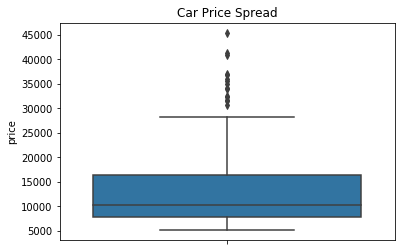

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [10]:
plt.title('Car Price Spread')
sns.boxplot(y=data.price)
plt.show()
print(data.price.describe())

Selon la boîte à moustache, le champ de prix a une **moyenne autour de 13K** et une **médiane autour de 10k** avec les valeurs de **voiture les plus chères à 45k** et les **voitures les moins chères est 5k**.

Comme on a moyenne > médiane, alors notre distribution est positivement asymétrique, comme on peut voir dans l'histogramme suivant:

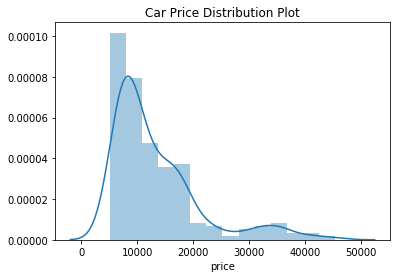

In [11]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)
plt.show()

***Conclusion***

Ce qui signifie que la plupart des prix offerts par cette entreprise sont bas.

Comme on voit au-dessous, on a **75%** des prix sont autour de **16k**, or **25%** entre **17k et 45k**.

In [12]:
print(data.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


# Visualisation des variables indépendantes:

# ******** Numérique ********

**I. Vérifier la relation linéaire entre la variable dépendate "Price" et les variables indépendantes numériques**

Dessiner Le diagramme de dispersion XY, et vérifier est-t-il linéaire ou pas ?

In [13]:
import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis,y_axis) :
    sns.pairplot(data,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

In [14]:
#Determiner la variable indépendante
y_vars=['price']

**Price VS Wheelbase - curbweight - boreratio**

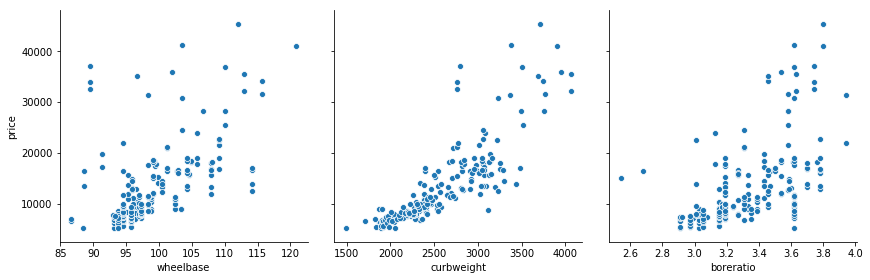

De la première vue, les 3 sont positivement corrélés mais s’étalent à des valeurs plus élevées.

Coefficient de Correlation entre Price et wheelbase:  57.781559829215 %
Coefficient de Correlation entre Price et curbweight:  83.53048793372966 %
Coefficient de Correlation entre Price et boreratio:  55.31732367984436 %


In [15]:
x_vars=['wheelbase','curbweight','boreratio']
pairplot(x_vars,y_vars)
print("De la première vue, les 3 sont positivement corrélés mais s’étalent à des valeurs plus élevées.")

p1=data['wheelbase']
p2=data['curbweight']
p3=data['boreratio']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nCoefficient de Correlation entre Price et wheelbase: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Coefficient de Correlation entre Price et curbweight: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Coefficient de Correlation entre Price et boreratio: ',pearson_coeff*100,'%')

**Price VS carlength - carwidth - carheight**

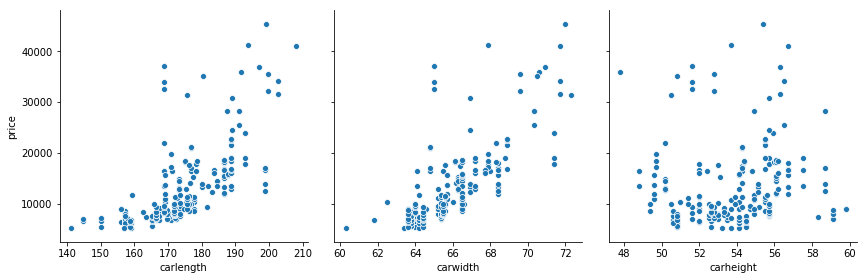

Carlength et Carwidth sont plus corrélés que carheight qui est plus étalé mais positif.

Coefficient de Correlation entre Price et carlength:  68.2920015677962 %
Coefficient de Correlation entre Price et carwidth:  75.93252997415114 %
Coefficient de Correlation entre Price et carheight:  11.933622657049444 %


In [16]:
x_vars=['carlength','carwidth', 'carheight']
pairplot(x_vars,y_vars)
print("Carlength et Carwidth sont plus corrélés que carheight qui est plus étalé mais positif.")

p1=data['carlength']
p2=data['carwidth']
p3=data['carheight']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nCoefficient de Correlation entre Price et carlength: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Coefficient de Correlation entre Price et carwidth: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Coefficient de Correlation entre Price et carheight: ',pearson_coeff*100,'%')

**Price VS enginesize - horsepower - stroke**

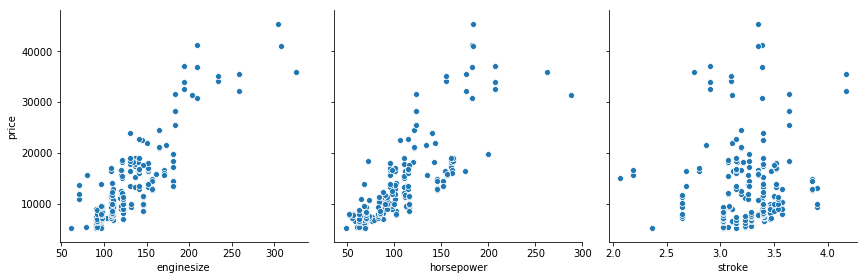

Enginesize et Horsepower sont positivement corrélées, mais Stroke est plus étalé (peut ne pas être liée).

Coefficient de Correlation entre Price et enginesize:  87.41448025245117 %
Coefficient de Correlation entre Price et horsepower:  80.81388225362217 %
Coefficient de Correlation entre Price et stroke:  7.944308388193101 %


In [17]:
x_vars=['enginesize','horsepower','stroke']
pairplot(x_vars,y_vars)
print("Enginesize et Horsepower sont positivement corrélées, mais Stroke est plus étalé (peut ne pas être liée).")

p1=data['enginesize']
p2=data['horsepower']
p3=data['stroke']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nCoefficient de Correlation entre Price et enginesize: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Coefficient de Correlation entre Price et horsepower: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Coefficient de Correlation entre Price et stroke: ',pearson_coeff*100,'%')

**Price VS compressionratio - peakrpm - symboling**

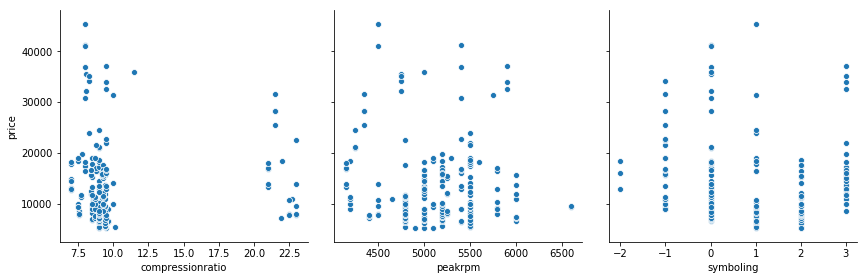

Compressionratio, Peakrpm and symboling sont pas corrélés.

Coefficient de Correlation entre Price et compressionratio:  6.798350579944266 %
Coefficient de Correlation entre Price et peakrpm:  -8.526715027785684 %
Coefficient de Correlation entre Price et symboling:  -7.997822464270351 %


In [18]:
x_vars=['compressionratio','peakrpm',"symboling"]
pairplot(x_vars,y_vars)
print("Compressionratio, Peakrpm and symboling sont pas corrélés.")

p1=data['compressionratio']
p2=data['peakrpm']
p3=data['symboling']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nCoefficient de Correlation entre Price et compressionratio: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Coefficient de Correlation entre Price et peakrpm: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Coefficient de Correlation entre Price et symboling: ',pearson_coeff*100,'%')

**Price VS citympg - highwaympg**

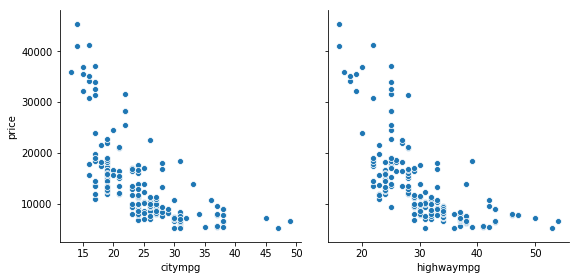

Citympg & Highwaympg sont corrélés négativement.
Plus les prix baissent, plus les distances sont élevées, ce qui signifie que les voitures les moins chères ont un meilleur kilométrage que les voitures chères.

Coefficient de Correlation entre Price et citympg:  -68.57513360270397 %
Coefficient de Correlation entre Price et highwaympg:  -69.75990916465565 %


In [19]:
x_vars=['citympg', 'highwaympg']
pairplot(x_vars,y_vars)
print("Citympg & Highwaympg sont corrélés négativement.\nPlus les prix baissent, plus les distances sont élevées, ce qui signifie que les voitures les moins chères ont un meilleur kilométrage que les voitures chères.")

p1=data['citympg']
p2=data['highwaympg']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nCoefficient de Correlation entre Price et citympg: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Coefficient de Correlation entre Price et highwaympg: ',pearson_coeff*100,'%')

**Conclusion**

Les variables corrélées (+) avec Price : **wheelbase,carlenght,carwidth,curbweight,enginesize,boreratio,horesepower**

Les variables corrélées (-) avec Price : **citympg,highwaympg**

Ces variables doivent être gardés pour un modèle pertinent, et les autres variables doivent être ignorés comme ils sont pas corrélées avec Price

**II. Vérification de la multicolinéarité entre les variables indépendantes corrélées ci-dessus**

In [20]:
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

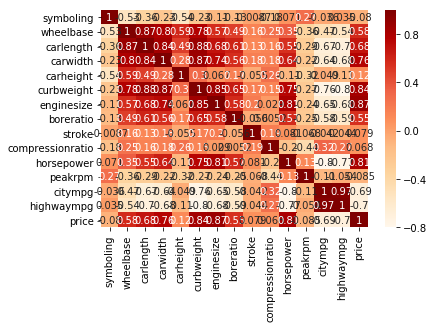

In [21]:
heatmap(20,12,data)

   **a. Examen de la corrélation entre les variables spécifiques aux dimensions d'une voiture i.e. weight , height etc**

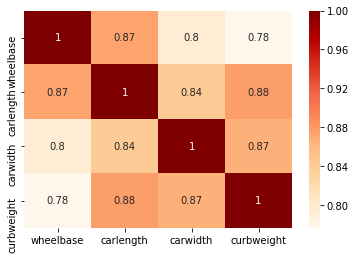

In [22]:
dimension_col_list = ['wheelbase', 'carlength', 'carwidth','curbweight']

heatmap(10,10,data.filter(dimension_col_list))

**Wheelbase** , **carlength**, **carwidth** et **curbweight** [ 0.80 - 0.88 ] sont très corrélés et nous devons garder seulement une entre eux.

**b. Examen de la corrélation entre les variables spécifiques à la performance d'une voiture**

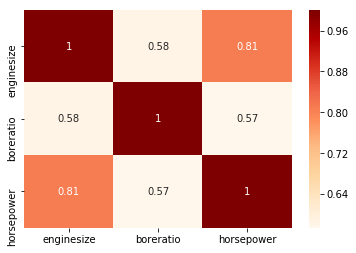

In [23]:
performance_col_list = ['enginesize','boreratio','horsepower']
heatmap(10,10,data.filter(performance_col_list))

**Horsepower** et **enginesize** sont très corrélés et nous devons garder une entre les deux.

**c. Examen de la corrélation entre citympg et highwaympg**

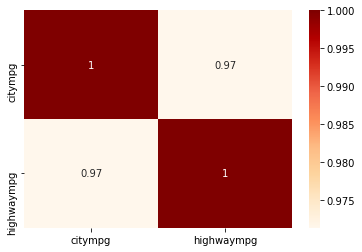

In [24]:
performance_col_list = ['citympg','highwaympg']
heatmap(10,10,data.filter(performance_col_list))

**citympg** et **highwaympg** sont très corrélés et nous devons garder un parmis les deux.

# ******** Categorique ********

**Price VS CompanyName**

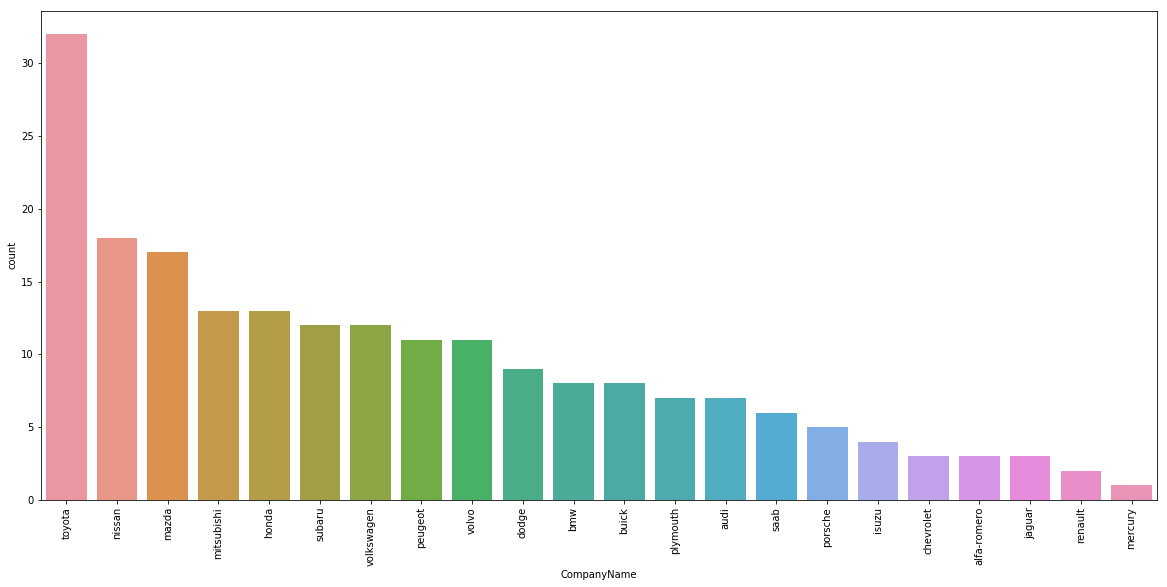

In [25]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = data['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=data, order=order)

plt.show()

En regardant l'histogramme ci-dessus, **Toyota** semble être très populaire parmi les constructeurs automobiles, suivi par **Nissan** et de **Mazda**.

**Price VS fueltype**

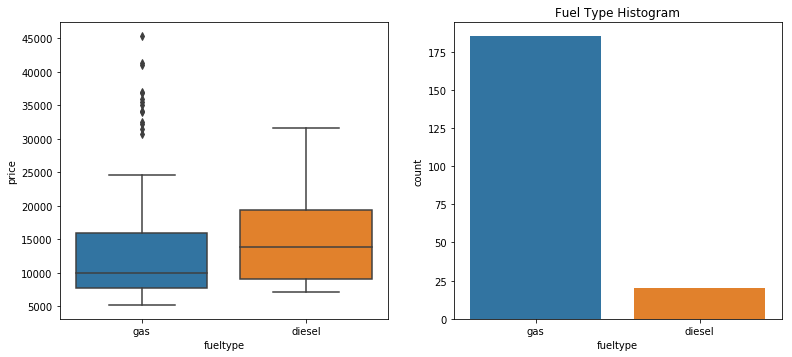

In [26]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = data['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=data, order=order)

plt.show()

Le prix moyen d'une **voiture diesel** est plus élevé que celui des **voitures à essence**, ce qui explique, d'après l'histogramme, pourquoi l'entreprise a vendu  plus de **voitures à essence** que de **voitures à diesel**.

**Price VS aspiration**

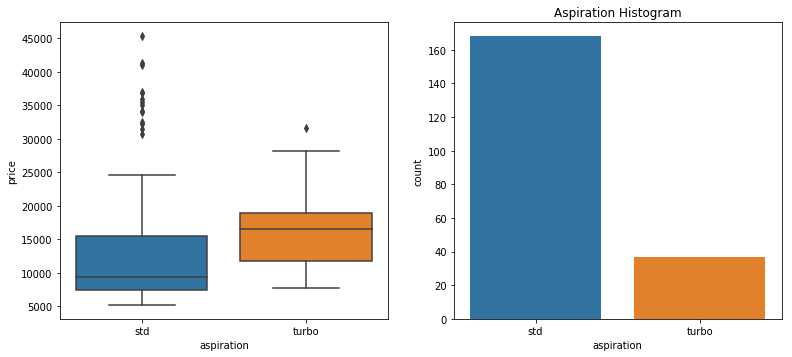

In [27]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = data['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=data, order=order)

plt.show()

Le prix moyen des voitures avec aspiration **turbo** est plus élevé que celui des voitures **standard**, ce qui explique, d'après l'histogramme, pourquoi l'entreprise vend plus de voitures **standard** que de voitures **turbo**.

**Price VS doornumber**

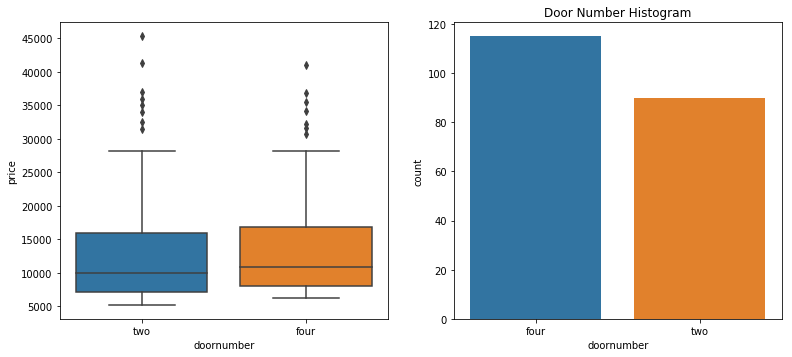

In [28]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = data['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=data, order=order)

plt.show()

Les valeurs de variable **doornumber** sont assez proches, ce qui signifie que le prix n’est pas affecté par le numéro de porte.

**Price VS enginelocation**

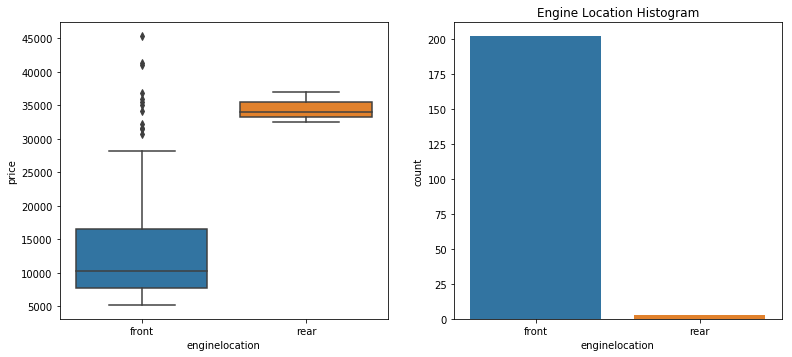

In [29]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = data['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=data, order=order)

plt.show()

Il est clair que les **voitures rear** sont très chères, ce qui explique pourquoi l'entreprise a vendu plus les voitures **front**.

**Price VS carbody**

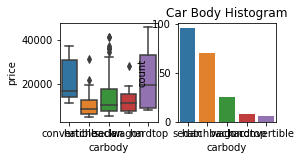

In [30]:
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = data['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=data, order=order)

plt.show()

Il semble que **sedan** est le plus favorisé.

**hardtop** a le prix moyen le plus élevé.

**Price VS fuelsystem**

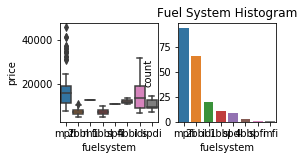

In [31]:
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = data['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=data, order=order)

plt.show()

**mpfi** est le type le plus favorisé de **fuelsystem**, même s'il a le prix moyen le plus élevé.

**Price VS enginetype**

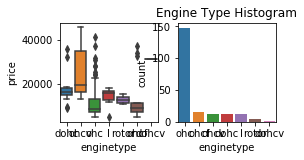

In [32]:
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = data['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=data, order=order)

plt.show()

**ohc** est le type de moteur le plus favorisé.

**Price VS cylindernumber**

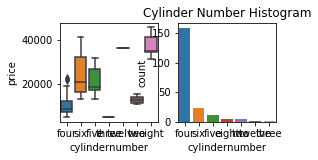

In [33]:
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Cylinder Number Histogram')
order = data['cylindernumber'].value_counts(ascending=False).index
sns.countplot(x='cylindernumber', data=data, order=order)

plt.show()

Le **quatre cylindres** semble être le plus favorisé.

Nous pouvons voir que les voitures chères ont **huit cylindres**, et **quatre cylindres** sont les moins chères.

**Price VS drivewheel**

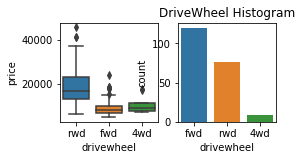

In [34]:
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = data['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=data, order=order)

plt.show()

**FWD** est le plus favorisé, suivi par **RWD**, et **4WD** est le moins favorisé même s'il est moins chère que **RWD**.

**Price VS symboling**

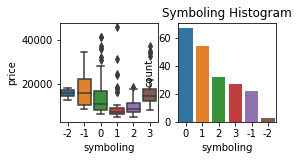

In [35]:
plt.subplot(2,3,1)
sns.boxplot(x=data.symboling, y=data.price)


plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = data['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=data, order=order)

plt.show()

Il semble que **symboling** avec les valeurs **0 et 1** sont les plus favorisés.

Les voitures avec **symboling -1 et -2** sont les plus chères, ce qui est logique car cela signifie que la voiture est plus sécurisé.

# Préparation des données

In [99]:
metadata_matrix_dataframe = get_meta_data(data)
list_potential_categorical_type(metadata_matrix_dataframe,data)

*********colonnes de type de données catégoriques potentielles*********


,Datatype,Valeurs_Uniques_Count,Valeurs_Uniques
index,,,
fuelsystem,object,8,"[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]"
enginetype,object,7,"[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]"
cylindernumber,object,7,"[four, six, five, three, twelve, two, eight]"
symboling,int64,6,"[3, 1, 2, 0, -1, -2]"
carbody,object,5,"[convertible, hatchback, sedan, wagon, hardtop]"
drivewheel,object,3,"[rwd, fwd, 4wd]"
fueltype,object,2,"[gas, diesel]"
aspiration,object,2,"[std, turbo]"
doornumber,object,2,"[two, four]"


**Création des Dummy Variables**

Nous pouvons voir que les valeurs de ces variables sont en chaînes de caractères.

Cependant, pour ajuster une ligne de régression, nous aurions besoin de valeurs numériques et non de chaînes. Par conséquent, nous devons les convertir en 1 et en 0 en utilisant les dummy variables. 

On peut faire ce qui suit::

**fueltype** {"**gas**": 1, "**diesel**": 0}

**aspiration** {"**std**": 1, "**turbo**": 0}

**doornumber** {"**two**": 1, "**four**": 0}

**enginelocation** {"**front**": 1, "**rear**": 0}

In [100]:
def binary_dummy_replace(x) :
     return x.map({"gas":1,"diesel":0,
                   "std":1,"turbo":0,
                   "two":1, "four":0,
                   "front": 1, "rear": 0})
def dummies(x,df):  
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    
    #l = temp.columns.values
    #for nm in l:
        #newt=x+"_"+nm
        #temp.rename({nm: Replace_Name(x)+"_"+nm}, axis=1, inplace=True)
        
    #print(temp.columns.values)
        
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [102]:
data = dummies('symboling',data)
data = dummies('CompanyName',data)
data = dummies('fueltype',data)
data = dummies('aspiration',data)
data = dummies('doornumber',data)
data = dummies('carbody',data)
data = dummies('drivewheel',data)
data = dummies('enginelocation',data)
data = dummies('enginetype',data)
data = dummies('cylindernumber',data)
data = dummies('fuelsystem',data)

Et voilà notre Dataset, tous est numérique

In [103]:
data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


**Preparation du Train et Test data**

On va diviser notre dataset en 70% pour l'apprentissage, et 30% pour le test

In [104]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
cars_train, cars_test= train_test_split(data, train_size=0.67, test_size=0.33, random_state = 0)

**Mise à l'échelle: Train Set & Test Set**

In [105]:
from sklearn.preprocessing import StandardScaler,scale
#on crée un objet de la classe StandardScaler
sc = StandardScaler() 

col_to_scale = ['wheelbase','carlength','carwidth','carheight','curbweight',
                'enginesize','boreratio','stroke','compressionratio','horsepower',
                'peakrpm','citympg','highwaympg','price',]

cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

cars_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-0.404817,-1.120550,2.075072,0.986451,-0.859830,-1.097737,-0.827703,-0.334625,-1.103524,-0.602488,0.333598,0.248893,-0.583062,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.363619,-1.023939,-0.140649,-1.029639,-0.741584,-0.725116,0.066528,-0.243539,-0.921031,0.184552,1.008180,1.038207,-0.680192,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.643761,-0.830716,0.096750,-1.193106,-0.883479,-0.985950,-0.414981,-0.334625,-0.947101,-0.208968,1.008180,1.196070,-0.755502,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-0.240027,-0.202743,0.729813,-0.603122,-0.741584,-1.246785,0.444856,2.853386,-1.364229,-0.602488,2.020054,2.458973,-0.680691,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.278201,-0.830716,0.096750,-1.287053,-0.883479,-1.172261,-0.414981,-0.334625,-0.947101,-0.208968,1.008180,1.196070,-0.917592,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


# Construction de modèle

Dans la partie de Compréhension & Exploiration des données, on a identifié les variables indépendantes pertinentes qui sont corrélés avec la variable indépendante **Price**, et qui sont pas corrélés entre eux (i.e pas de multi-colinéarité), et on a dit qu'il faut les garder, et igonrer le reste.

Pour faire ça, nous utiliserons une approche mixte pour trouver les caractéristiques pertinentes:

1. Identifier ces variables en utilisant **RFE (Elimination des caractéristiques récursives)**

2. Approche manuelle pour trouver le bon ajustement

**Division en ensembles X_train et y_train pour la construction du modèle**

In [106]:
y_train = cars_train.loc[:,cars_train.columns == 'price']

X_train = cars_train.loc[:, cars_train.columns != 'price']

**Division en ensembles X_test et y_test**

In [107]:
y_test = cars_test.loc[:,cars_test.columns == 'price']

X_test = cars_test.loc[:, cars_test.columns != 'price']

In [108]:
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-0.404817,-1.120550,2.075072,0.986451,-0.859830,-1.097737,-0.827703,-0.334625,-1.103524,-0.602488,0.333598,0.248893,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.363619,-1.023939,-0.140649,-1.029639,-0.741584,-0.725116,0.066528,-0.243539,-0.921031,0.184552,1.008180,1.038207,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.643761,-0.830716,0.096750,-1.193106,-0.883479,-0.985950,-0.414981,-0.334625,-0.947101,-0.208968,1.008180,1.196070,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-0.240027,-0.202743,0.729813,-0.603122,-0.741584,-1.246785,0.444856,2.853386,-1.364229,-0.602488,2.020054,2.458973,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.278201,-0.830716,0.096750,-1.287053,-0.883479,-1.172261,-0.414981,-0.334625,-0.947101,-0.208968,1.008180,1.196070,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


**RFE (élimination des caractéristiques récursives)**

L'utilisation de **RFE** nous donne un moyen automatisé de sélectionner des attributs importants capable d'influencer la variable dépendantes (i.e Price).

Nous utiliserons ici une approche mixte et dans un premier temps, nous utiliserons simplement les fonctionnalités renvoyées par **RFE** comme modèle de départ.

In [109]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [110]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Appeler la méthode **RFE** pour avoir les variables importants

In [111]:
rfe = RFE(regression,10)
rfe = rfe.fit(X_train,y_train)

**Extraire les variables importantes**

La méthode **RFE()** retourne un tableau "**support_**"  des variables considérés comme importantes:

Si **rfe.support_** == **True**: Variable important

Si **rfe.support_** == **False**: Variable pas important

In [112]:
for z in range(len(X_train.columns)):
    print(X_train.columns[z],'\t\t\t',rfe.support_[z])

wheelbase 			 False
carlength 			 False
carwidth 			 False
carheight 			 False
curbweight 			 True
enginesize 			 True
boreratio 			 False
stroke 			 False
compressionratio 			 False
horsepower 			 False
peakrpm 			 False
citympg 			 False
highwaympg 			 False
symboling_-1 			 False
symboling_0 			 False
symboling_1 			 False
symboling_2 			 False
symboling_3 			 False
CompanyName_audi 			 False
CompanyName_bmw 			 True
CompanyName_buick 			 True
CompanyName_chevrolet 			 False
CompanyName_dodge 			 False
CompanyName_honda 			 False
CompanyName_isuzu 			 True
CompanyName_jaguar 			 False
CompanyName_mazda 			 False
CompanyName_mercury 			 False
CompanyName_mitsubishi 			 False
CompanyName_nissan 			 False
CompanyName_peugeot 			 True
CompanyName_plymouth 			 False
CompanyName_porsche 			 True
CompanyName_renault 			 False
CompanyName_saab 			 False
CompanyName_subaru 			 False
CompanyName_toyota 			 False
CompanyName_volkswagen 			 False
CompanyName_volvo 			 False
fueltype_gas 			 Fal

**Les colonnes sélectionnés par RFE**

In [113]:
col = X_train.columns[rfe.support_]
for x in col:
    print(x)

curbweight
enginesize
CompanyName_bmw
CompanyName_buick
CompanyName_isuzu
CompanyName_peugeot
CompanyName_porsche
enginelocation_rear
enginetype_rotor
cylindernumber_two


# Utilisation de package  statsmodel, pour des statistiques détaillées

Voici notre Dataset pour l'apprentissage, **après RFE**

In [114]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,CompanyName_bmw,CompanyName_buick,CompanyName_isuzu,CompanyName_peugeot,CompanyName_porsche,enginelocation_rear,enginetype_rotor,cylindernumber_two
155,0.986451,-0.859830,0,0,0,0,0,0,0,0
97,-1.029639,-0.741584,0,0,0,0,0,0,0,0
54,-1.193106,-0.883479,0,0,0,0,0,0,0,0
184,-0.603122,-0.741584,0,0,0,0,0,0,0,0
51,-1.287053,-0.883479,0,0,0,0,0,0,0,0


In [115]:
import statsmodels.api as sm 

def color_code_vif_values(val):
    """
    Prend un scalaire et retourne une chaîne avec la propriété css 'color: red' pour 10, noir sinon.
    """
    if val > 10 : color = 'red' 
    elif val > 5 and val <= 10 : color = 'blue'
    elif val > 0 and val <= 5 : color = 'darkgreen'
    else : color = 'black'
    return 'color: %s' % color

def drop_col(dataframe,col_to_drop) :
    dataframe.drop([col_to_drop],axis=1,inplace=True)
    return dataframe

def display_vif(x) :
    #Calculer les VIFs pour le nouveau modèle
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = x
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index("Features")
    vif = vif.sort_values(by = "VIF", ascending = False)
    df = pd.DataFrame(vif.VIF).style.applymap(color_code_vif_values)
    display(df)
    
model_count = 0

def statsmodel_summary(y_var,x_var) :
    global model_count
    model_count = model_count + 1
    text = "*****MODEL - " + str(model_count)
    print(text)
    
    x_var_const = sm.add_constant(x_var) # adding constant
    lm = sm.OLS(y_var,x_var_const).fit() # calculating the fit
    print(lm.summary()) # print summary for analysis
    display_vif(x_var_const.drop(['const'],axis=1))
    return x_var_const , lm

# I. Vérifier la multicolinéarité entre les variables sélectionnées par RFE

Pour faire ça, on se base sur 2 choses:
1. **P-Value**: 
    
    P-Value <=**0.05** signifie que cette variable indépendante particulière améliore considérablement l'ajustement du modèle
    
    p-value >**0.05** pas d'amélioration
    

2. **VIF(Facteur d'inflation de la variance):** 

    VIF > 5, il y a une indication que la multicolinéarité peut être présente, mais pas assez pour s'inquiéter. 
    
    VIF > 10, il existe certainement une multicolinéarité parmi les variables.

In [116]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 1
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     206.6
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           2.58e-69
Time:                        14:28:27   Log-Likelihood:                -14.060
No. Observations:                 137   AIC:                             46.12
Df Residuals:                     128   BIC:                             72.40
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
enginetype_rotor,inf
cylindernumber_two,inf
curbweight,5.77
enginesize,5.59
CompanyName_peugeot,1.38
CompanyName_buick,1.28
CompanyName_bmw,1.04


Analyse P-value: P-value de **CompanyName_isuzu** > 0.05. On doit la supprimer.

In [117]:
X_train_rfe = X_train_rfe.drop(["CompanyName_isuzu"], axis = 1)
X_train_rfe.head()

,curbweight,enginesize,CompanyName_bmw,CompanyName_buick,CompanyName_peugeot,CompanyName_porsche,enginelocation_rear,enginetype_rotor,cylindernumber_two
155,0.986451,-0.859830,0,0,0,0,0,0,0
97,-1.029639,-0.741584,0,0,0,0,0,0,0
54,-1.193106,-0.883479,0,0,0,0,0,0,0
184,-0.603122,-0.741584,0,0,0,0,0,0,0
51,-1.287053,-0.883479,0,0,0,0,0,0,0


In [118]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     233.2
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           5.35e-70
Time:                        14:28:56   Log-Likelihood:                -15.341
No. Observations:                 137   AIC:                             46.68
Df Residuals:                     129   BIC:                             70.04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
enginetype_rotor,inf
cylindernumber_two,inf
curbweight,5.76
enginesize,5.57
CompanyName_peugeot,1.38
CompanyName_buick,1.27
CompanyName_bmw,1.04


Analyse P-value: Tous les variables ont p-value < 0.05

Etape suivante: Supprimer **CompanyName_porsche**, car **VIF** > 10 

In [119]:
X_train_rfe = X_train_rfe.drop(["CompanyName_porsche"], axis = 1)
X_train_rfe.head()

,curbweight,enginesize,CompanyName_bmw,CompanyName_buick,CompanyName_peugeot,enginelocation_rear,enginetype_rotor,cylindernumber_two
155,0.986451,-0.859830,0,0,0,0,0,0
97,-1.029639,-0.741584,0,0,0,0,0,0
54,-1.193106,-0.883479,0,0,0,0,0,0
184,-0.603122,-0.741584,0,0,0,0,0,0
51,-1.287053,-0.883479,0,0,0,0,0,0


In [120]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 3
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     233.2
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           5.35e-70
Time:                        14:29:20   Log-Likelihood:                -15.341
No. Observations:                 137   AIC:                             46.68
Df Residuals:                     129   BIC:                             70.04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
enginetype_rotor,inf
cylindernumber_two,inf
curbweight,5.76
enginesize,5.57
CompanyName_peugeot,1.38
CompanyName_buick,1.27
enginelocation_rear,1.19
CompanyName_bmw,1.04


Analyse P-value: Tous les variables ont p-value < 0.05

Etape suivante: Supprimer **enginetype_rotor**, car **VIF** > 10 

In [121]:
X_train_rfe = X_train_rfe.drop(["enginetype_rotor"], axis = 1)
X_train_rfe.head()

,curbweight,enginesize,CompanyName_bmw,CompanyName_buick,CompanyName_peugeot,enginelocation_rear,cylindernumber_two
155,0.986451,-0.859830,0,0,0,0,0
97,-1.029639,-0.741584,0,0,0,0,0
54,-1.193106,-0.883479,0,0,0,0,0
184,-0.603122,-0.741584,0,0,0,0,0
51,-1.287053,-0.883479,0,0,0,0,0


In [122]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 4
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     233.2
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           5.35e-70
Time:                        14:29:42   Log-Likelihood:                -15.341
No. Observations:                 137   AIC:                             46.68
Df Residuals:                     129   BIC:                             70.04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
curbweight,5.76
enginesize,5.57
CompanyName_peugeot,1.38
CompanyName_buick,1.27
enginelocation_rear,1.19
cylindernumber_two,1.09
CompanyName_bmw,1.04


Analyse P-value: Tous les variables ont p-value < 0.05

Etape suivante: Supprimer **curbweight**, car **VIF** > 5 

In [123]:
X_train_rfe = X_train_rfe.drop(["curbweight"], axis = 1)
X_train_rfe.head()

,enginesize,CompanyName_bmw,CompanyName_buick,CompanyName_peugeot,enginelocation_rear,cylindernumber_two
155,-0.859830,0,0,0,0,0
97,-0.741584,0,0,0,0,0
54,-0.883479,0,0,0,0,0
184,-0.741584,0,0,0,0,0
51,-0.883479,0,0,0,0,0


In [124]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 5
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           1.74e-60
Time:                        14:30:09   Log-Likelihood:                -41.505
No. Observations:                 137   AIC:                             97.01
Df Residuals:                     130   BIC:                             117.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
enginesize,1.39
CompanyName_buick,1.24
enginelocation_rear,1.07
CompanyName_bmw,1.03
cylindernumber_two,1.03
CompanyName_peugeot,1.01


Analyse P-value: P-value de **CompanyName_peugeot** > 0.05. On doit la supprimer.

In [125]:
X_train_rfe = X_train_rfe.drop(["CompanyName_peugeot"], axis = 1)
X_train_rfe.head()

,enginesize,CompanyName_bmw,CompanyName_buick,enginelocation_rear,cylindernumber_two
155,-0.859830,0,0,0,0
97,-0.741584,0,0,0,0
54,-0.883479,0,0,0,0
184,-0.741584,0,0,0,0
51,-0.883479,0,0,0,0


In [126]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 6
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     212.6
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           4.75e-61
Time:                        14:30:33   Log-Likelihood:                -43.020
No. Observations:                 137   AIC:                             98.04
Df Residuals:                     131   BIC:                             115.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
enginesize,1.38
CompanyName_buick,1.24
enginelocation_rear,1.07
CompanyName_bmw,1.03
cylindernumber_two,1.03


Tous les **P-Values** sont inférieur à 0.05, et tous les valeurs **VIF** sont inférieurs à 5.

Passant maintenant à la prediction et évaluation de notre modèle

# Prédiction et Evaluation

# 1. Prédiction

Création de **X_test_new** en gardant seulement les variables pertinents trouvés par **RFE**.

In [127]:
#Array contenant les noms des variables importantes
final_features = list(X_train_rfe.columns)

#Filtrer le dataset de test
X_test_new = X_test.filter(final_features)

X_test_new.head()

,enginesize,CompanyName_bmw,CompanyName_buick,enginelocation_rear,cylindernumber_two
52,-0.827930,0,0,0,0
181,0.929068,0,0,0,0
5,0.301569,0,0,0,0
18,-1.580929,0,0,0,0
188,-0.376131,0,0,0,0


**Utilisons maintenant notre modèle pour faire des prédictions.**

In [128]:
# Making predictions
lm = sm.OLS(y_train,X_train_rfe).fit()

# statsmodels
# first artificially add intercept to X, as advised in the docs:
#lm = sm.OLS(y_train,sm.add_constant(X_train_rfe)).fit()

#y_pred = lm.predict(sm.add_constant(X_test_new))
y_pred=lm.predict(X_test_new)

# 2. Evaluation

# **Analyse résiduelle du modèle**

Les résidus (i.e erreurs) sont tous simplement la différence entre les prédictions et les observations

In [129]:
resid = y_test - y_pred.to_frame('price')

**2-A. Indépendance des erreurs**

Cela signifie que les résidus (i.e erreurs) ne doivent pas être corrélés.

1. **Graphe des résidus contre leur ordre.**

Ce qui doit nous alarmer, c'est l'existence d'un tendance, qui nous dit que les erreurs sont en faite dépendants.

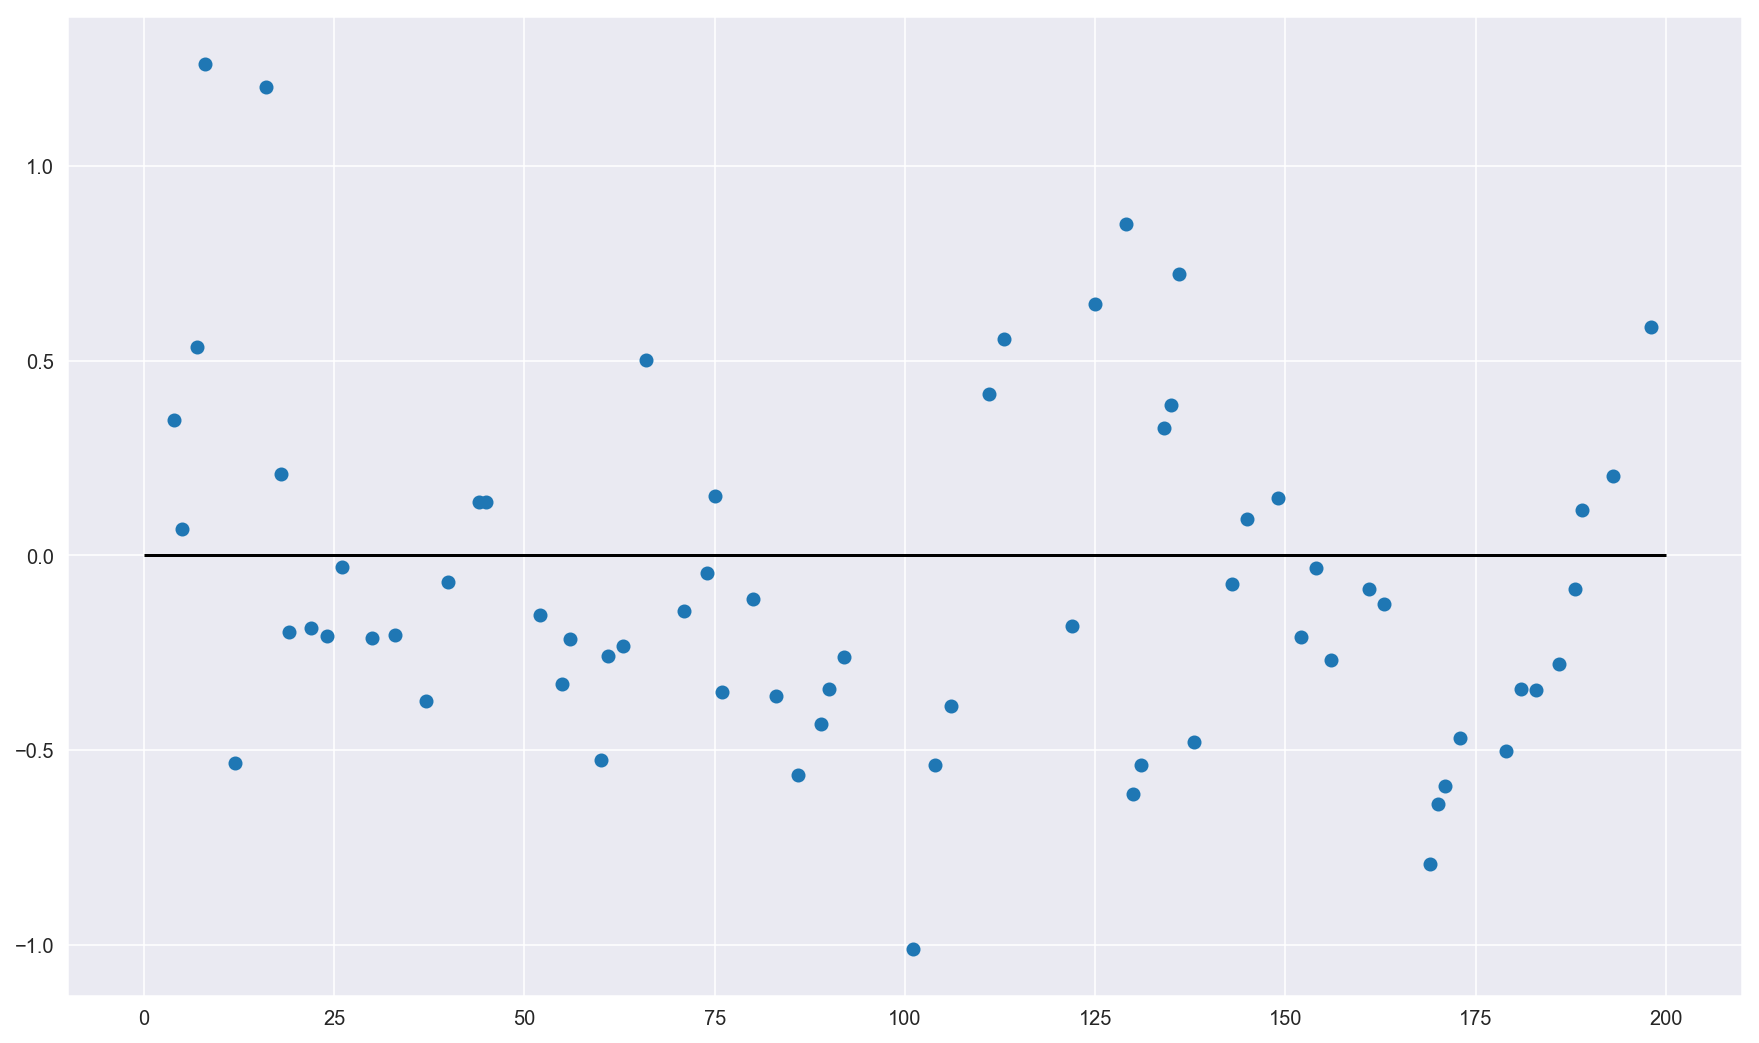

In [132]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)

Comme on voit, les points sont dispersés au hasard. pas de tendance.

2. Teste de **Durbin_Watson**

Le teste de **Durbin-Watson** teste l’hypothèse nulle que les résidus ne sont pas auto-corrélés linéairement.L'autocorrélation se produit lorsque les résidus sont dépendants les uns des autres.

Le teste renvoie une valeur **d** entre 0 et 4.

Une valeur **d = 2**: Pas d'autocorrélation détectée dans l'échantillon.

Une valeur **d <** **2** : indiquent une autocorrélation positive.

Une valeur **d >** **2** : indiquent une autocorrélation négative.


En règle générale, des valeurs de **d ~ 2** indiquent qu'il n'y a pas de dépendance (pas d'auto-corrélation) entre les résidus.

In [133]:
from statsmodels.stats.stattools import durbin_watson

In [134]:
print(durbin_watson(resid))

[1.9912684]


3. **ACF - Auto-Correlation Function plots**

Nous voulons voir si la valeur d'**ACF** est significative pour chaque barre.

En appelant la fonction, nous indiquons le niveau de signification (alpha =0.5 dans notre cas) qui nous intéresse et la zone critique est tracée sur le graphe (En bleu).

Des corrélations significatives se situent en dehors de cette zone.

**>>> Note**: Premiére barre est toujours à 1.

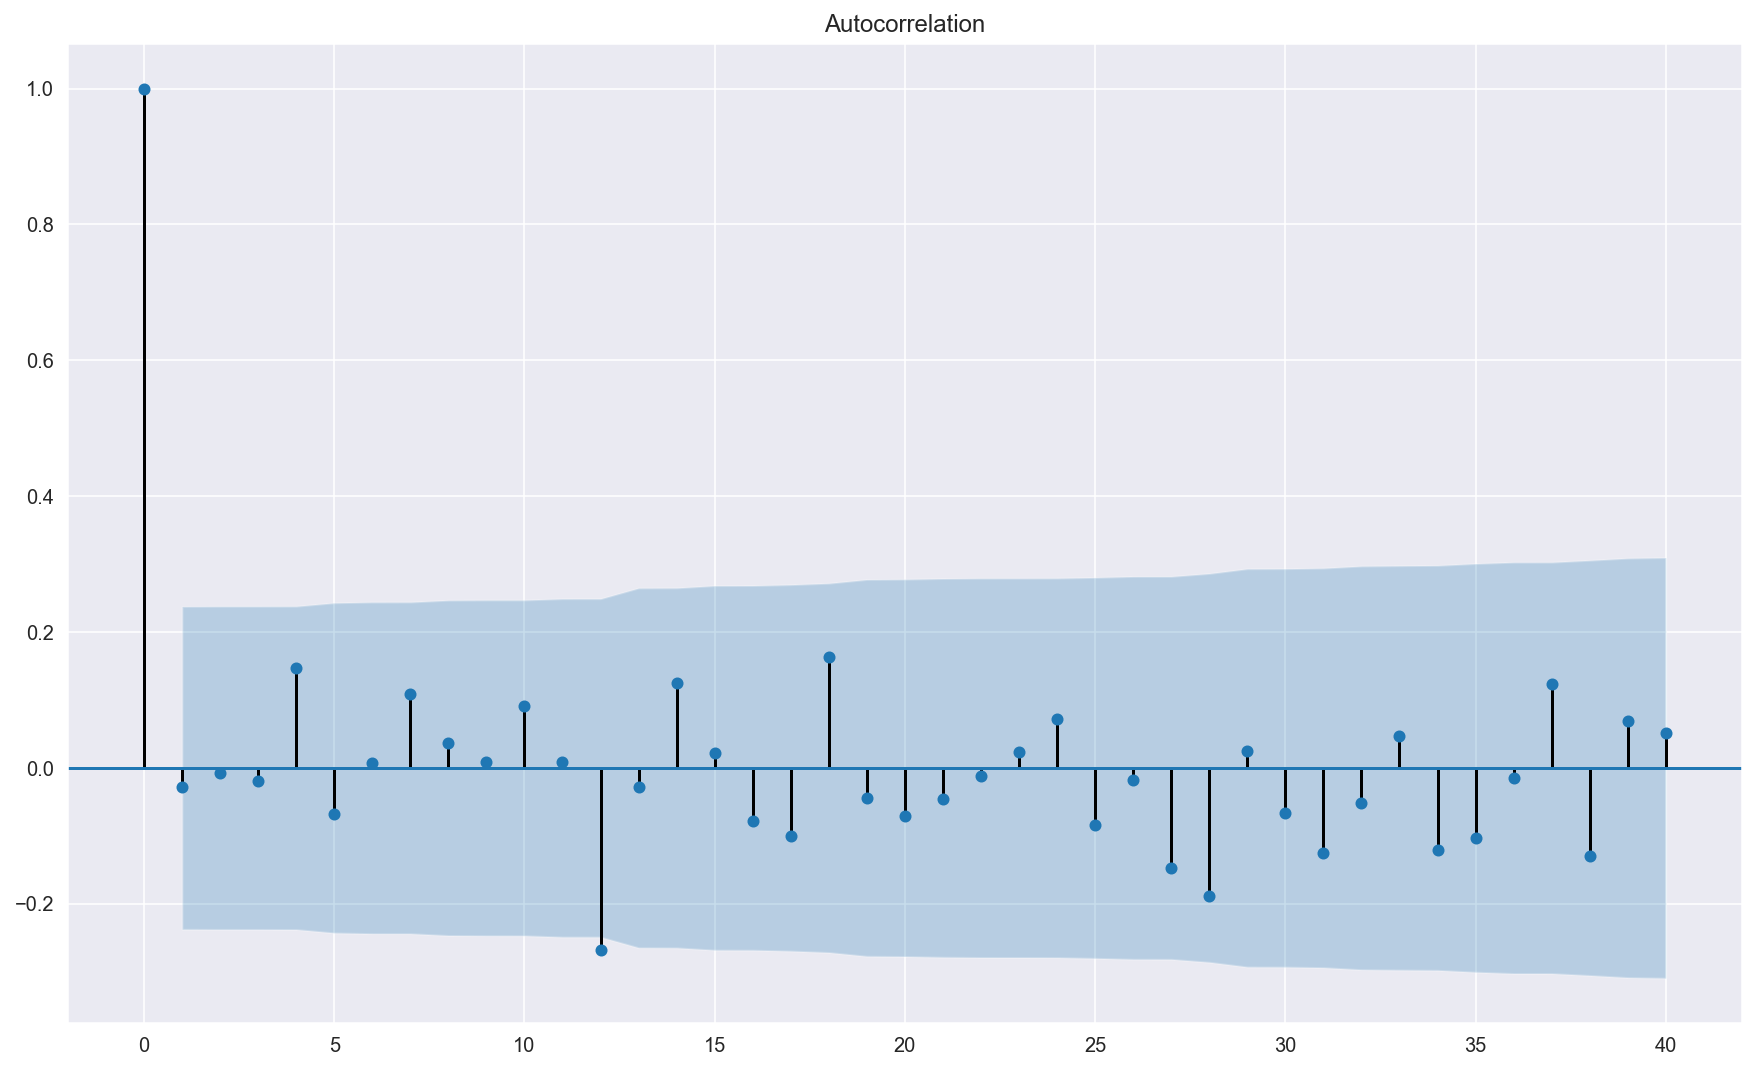

In [139]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(resid, lags=40 , alpha=0.05)
acf.show()

On voit que tous les barres sont à l'intérieur du zone bleu, sauf une, ce qui est acceptable comme **Durbin_Watson** a retourner une valeur très proche à 2.

**2-B. Homo-scédasticité**

Cette hypothèse indique que la variance des résidus doit être similaire pour les valeurs des variables indépendantes.

Nous pouvons vérifier ça en traçant les résidus par rapport aux valeurs prédites par le modèle de régression.

Pour identifier **l'homo-scédasticité** dans le graphe, l'emplacement des points doit être aléatoire et aucune tendance ne doit être visible, et la ligne rouge dans le graphe doit être aussi plate que possible (pas en forme d'arche).

**Test de Goldfeld-Quandt:**

Il teste:

1. Hypothèse nulle : les termes d'erreur sont homo-scédastiques
2. Hypothèse alternative: Les termes d'erreur sont hétéro-scédastiques.

**Rappel:**

Si P-value <= 0.05 ==> Nous rejetons l'hypothèse nulle

Si P-Value > 0.05 ==> L'hypothèse nulle est vraie


 Goldfeld-Quandt test ----
                value
F statistic  1.326167
p-value      0.130736

 Residuals plots ----


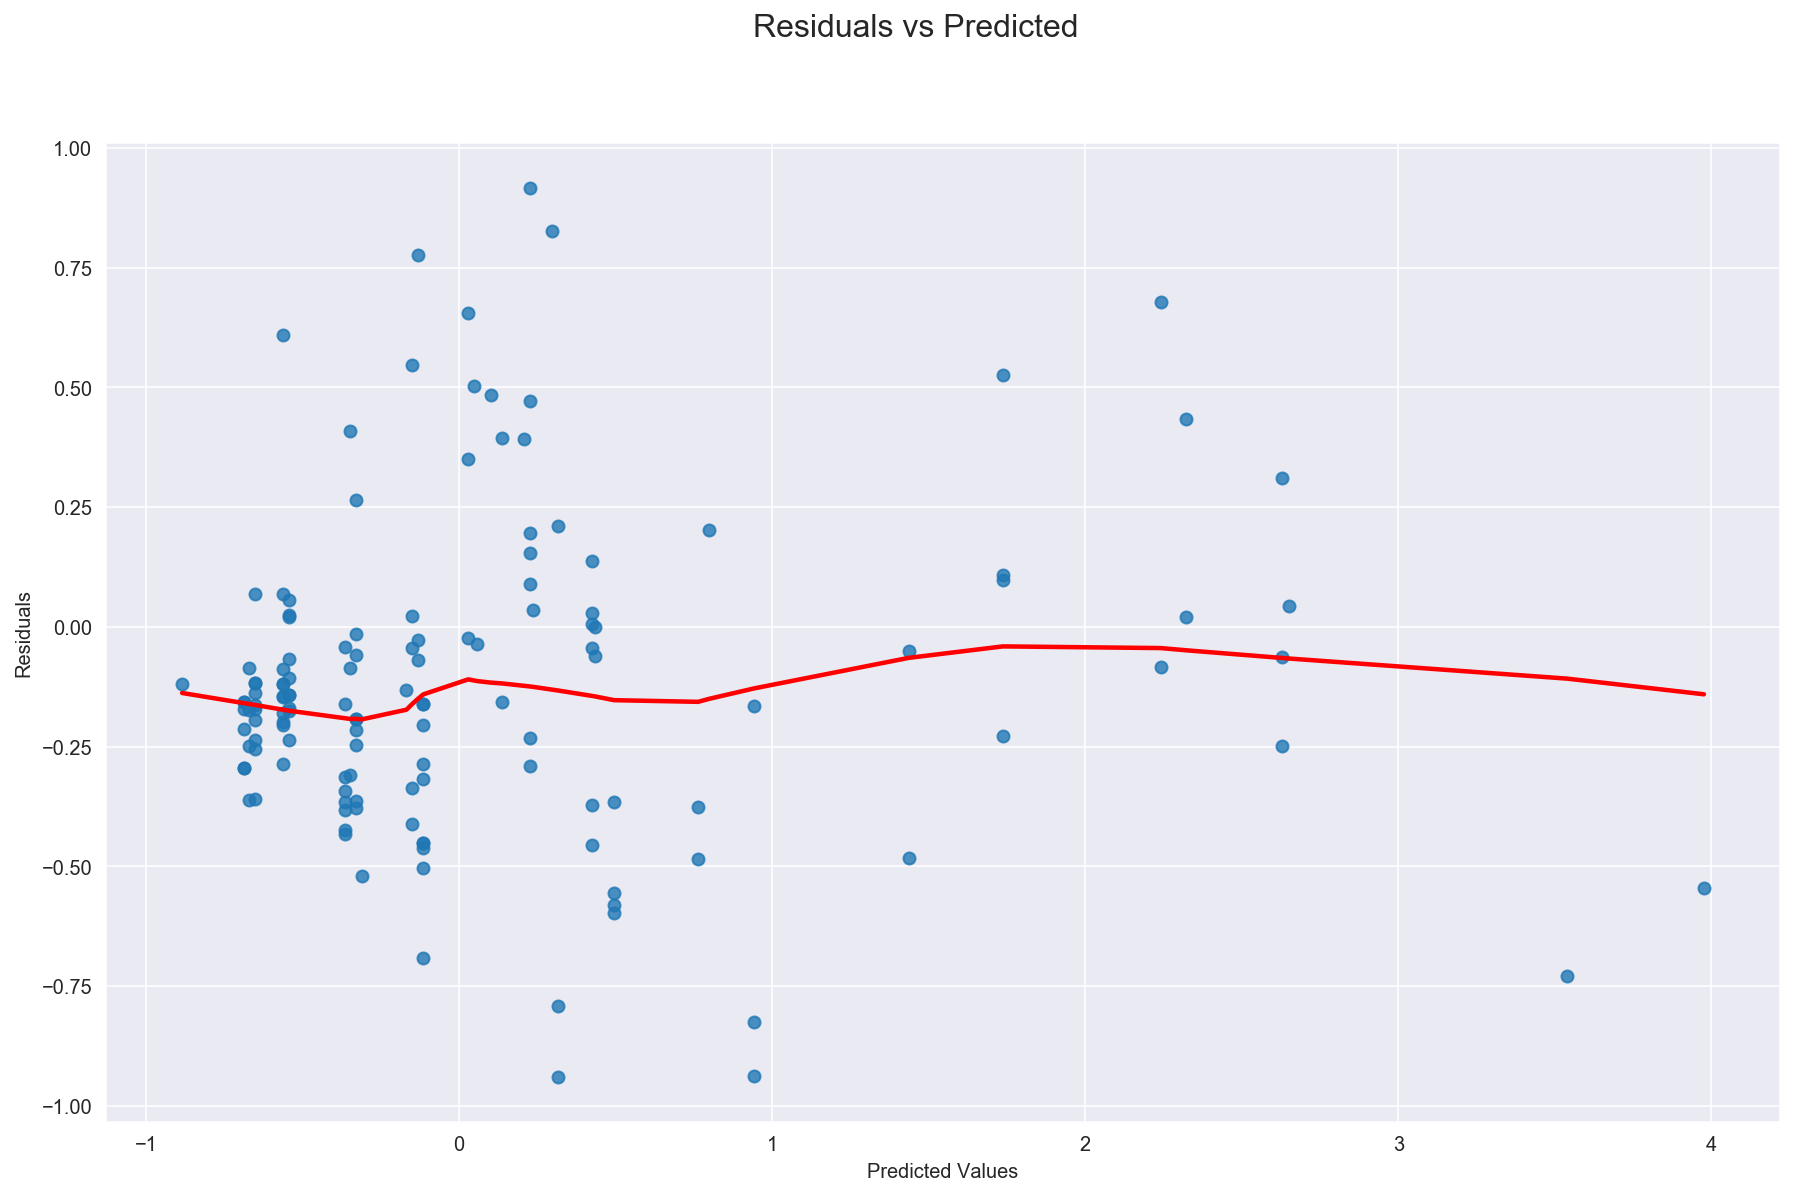

In [135]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Fonction de test de l'homoscédasticité des résidus dans un modèle de régression linéaire.

    Il compare les valeurs résiduelles aux valeurs prédites et exécute les tests de Goldfeld-Quandt.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid

    #fit_reg=False
    sns.regplot(x=fitted_vals, y=resids, lowess=True, line_kws={'color': 'red'})
    plt.suptitle('Residuals vs Predicted', fontsize=16)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lm)

**Analyse:**

P-Value de Goldfeld-Quandt test > 0.05, donc on accepte **H0** disant que les termes d'erreur sont homo-scédastiques, ce qui veut dire que les résidus ont une variance constante.

**2-C. Normalité de la distribution d'erreur**

À tout moment dans nos valeurs X, les points de données doivent normalement être répartis autour de la ligne de régression. 


Nos valeurs devraient être assez proches de la ligne, uniformément réparties avec seulement quelques outliers.

Un histogramme des résidus (erreurs) dans notre modèle peut être utilisé pour vérifier s'ils sont normalement distribués ou pas.

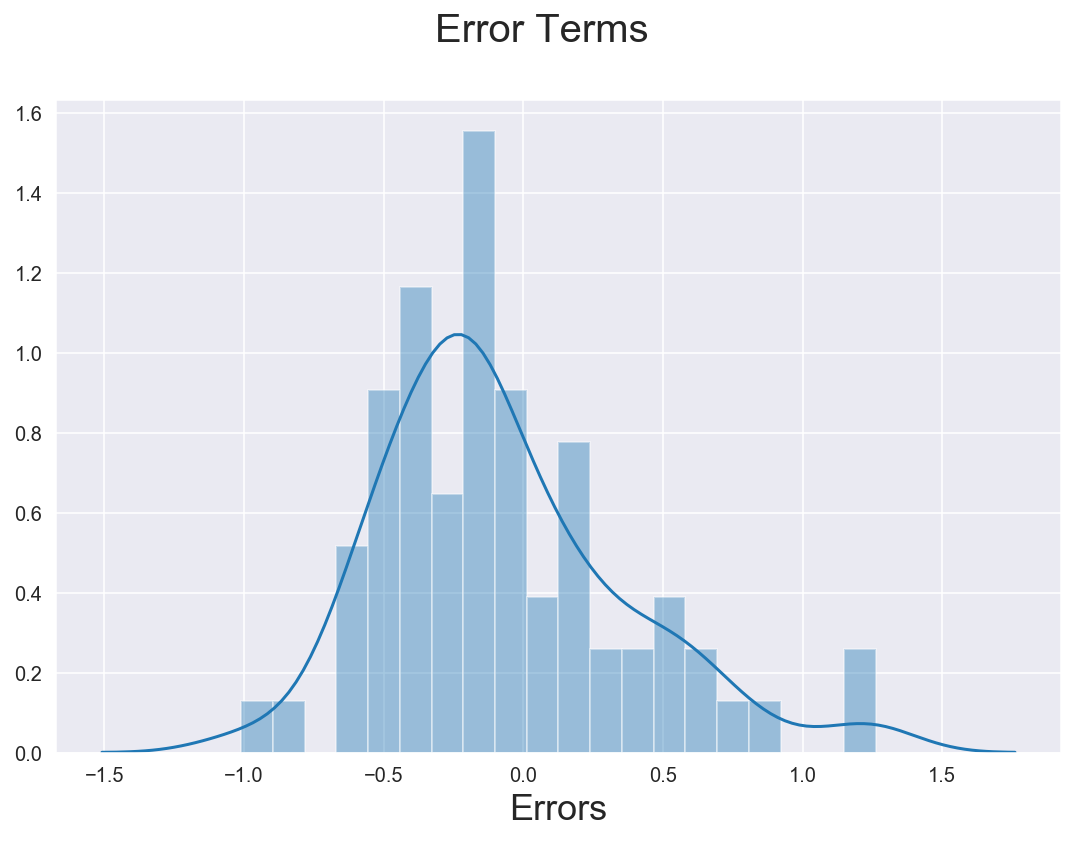

In [130]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Analyse:** Les termes d'erreur sont un petit peu asymétrique.

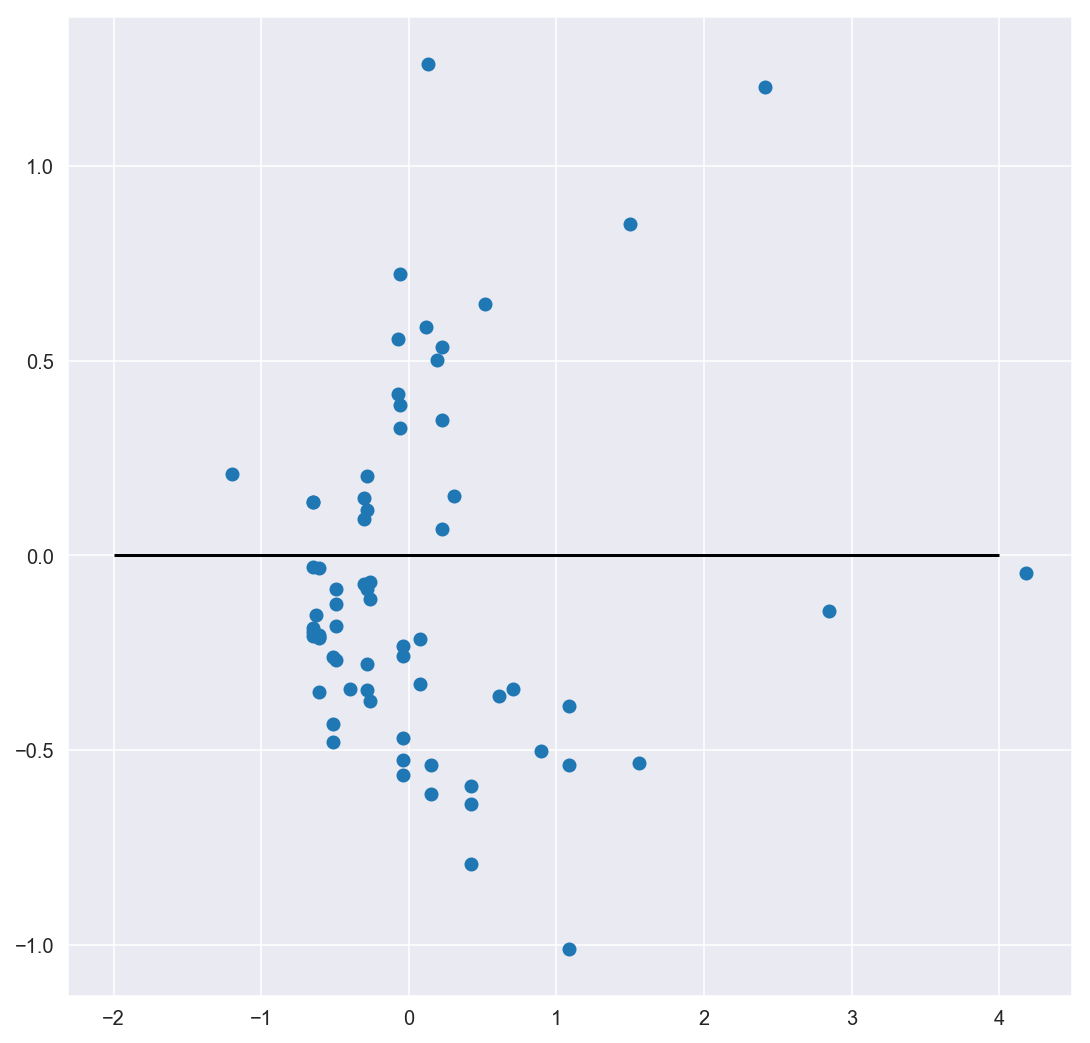

In [131]:
#plt.figure(figsize=(9,9))
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)

**Analyse:** Les points de données sont un peu plus d'un côté que de l'autre

**Teste d'Anderson-Darling** et **Q-Q** Plot

1. **Q-Q Plot** des résidus:
    
Un trace de déviation en forme d'arc par rapport à la diagonale implique que les résidus présentent une asymétrie excessive, c'est-à-dire que la distribution n'est pas symétrique, avec trop de résidus importants dans une direction.

2. **Teste d'Anderson-Darling**

Reste le plus utilisé par les experts, pour vérifier la normailté des erreurs.

Il teste:

**H0:** Les données suivent la distribution normale

**H1:** Les données ne suivent pas la distribution normale

Comment vérifier **H0** ?

Un niveau de signification est choisie (5% dans notre cas), qui est associé avec une valeur critique.

Si la statistique **A-D** renvoyée est supérieure à la valeur critique, alors pour le niveau de signification choisie, alors **H0** doit être rejetée. 

----Anderson-Darling test ---- 
statistique: 2.3057, valeur critique de 5%: 0.7660


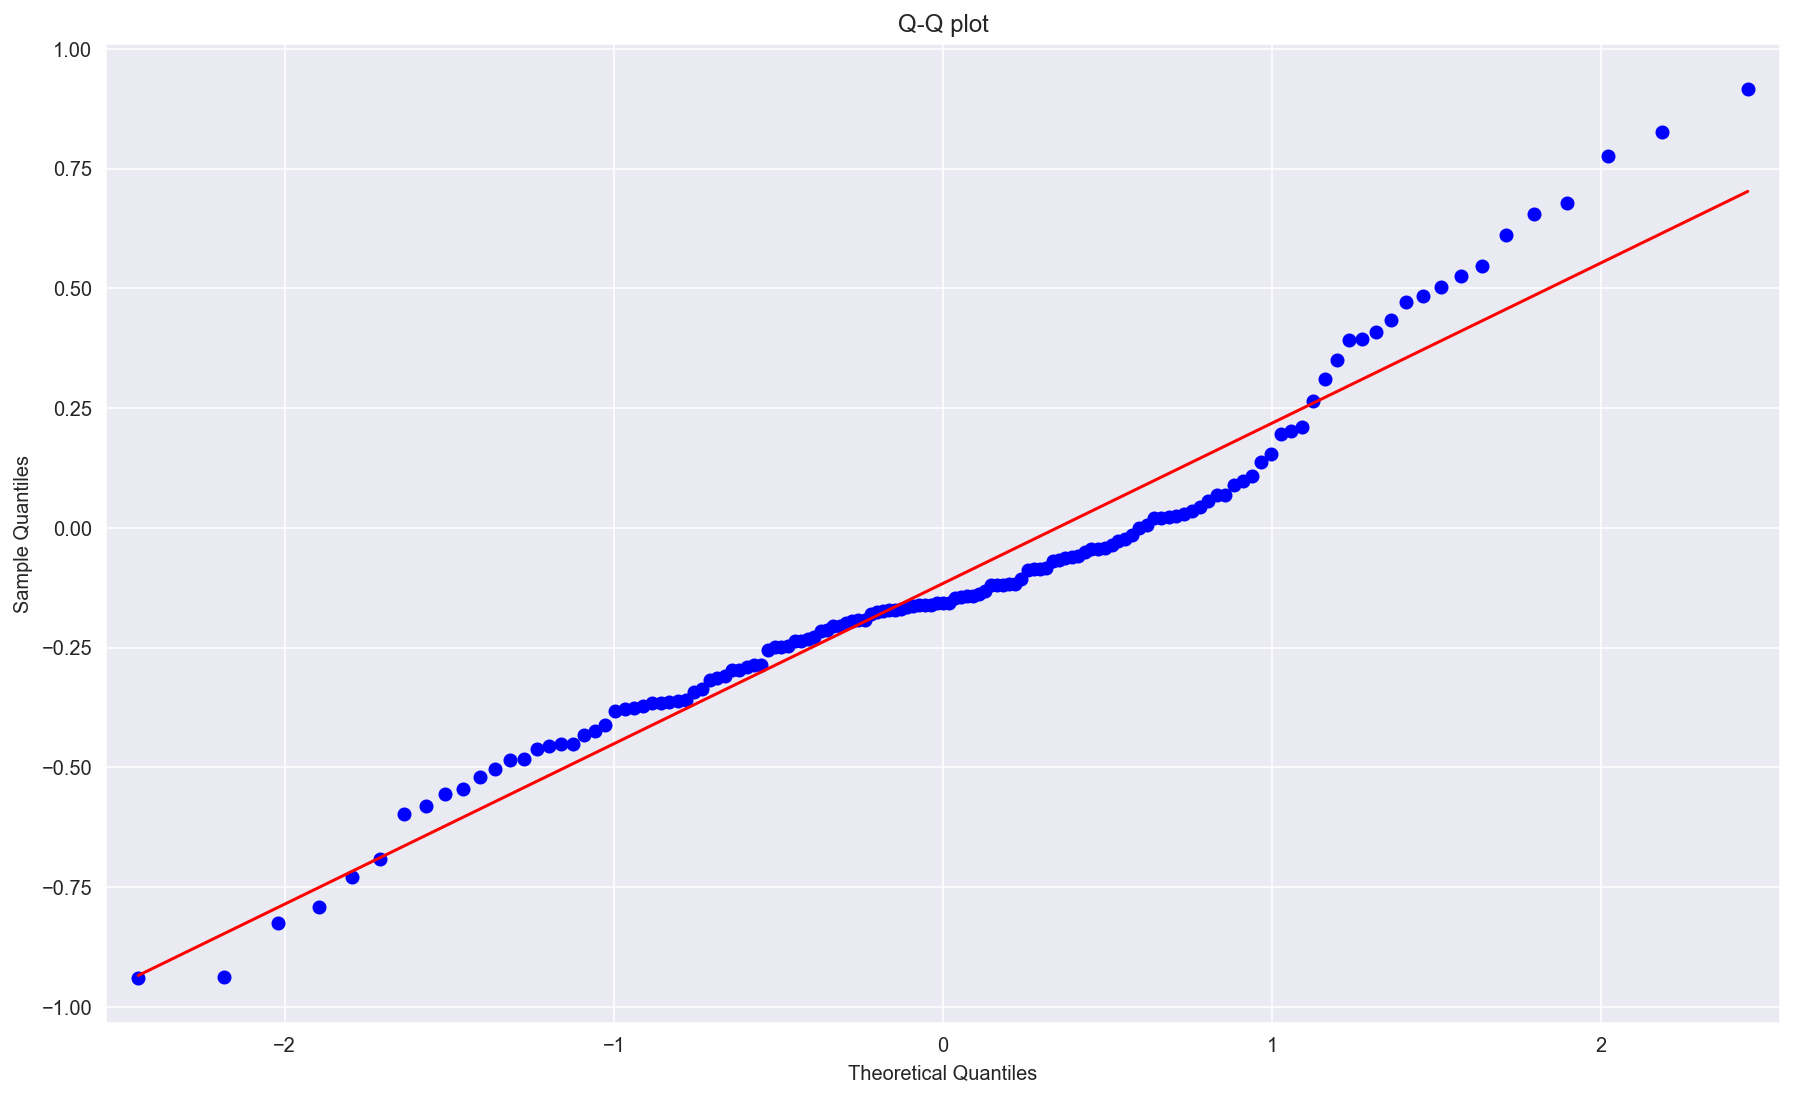

In [140]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(lm.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    ad = stats.anderson(lm.resid, dist='norm')
    
    print(f'----Anderson-Darling test ---- \nstatistique: {ad.statistic:.4f}, valeur critique de 5%: {ad.critical_values[2]:.4f}')
    
normality_of_residuals_test(lm)

La trace  prend un peu la forme d’une arche au milieu mais pas de manière agressive

le test accepte **H0** que les données suivent la distribution normale (stats < valeur critique de 5%)

**Évaluation du test via la comparaison de y_pred et de y_test**

Ce que nous cherchons c'est que les erreurs doivent être aussi proches que possible de la ligne

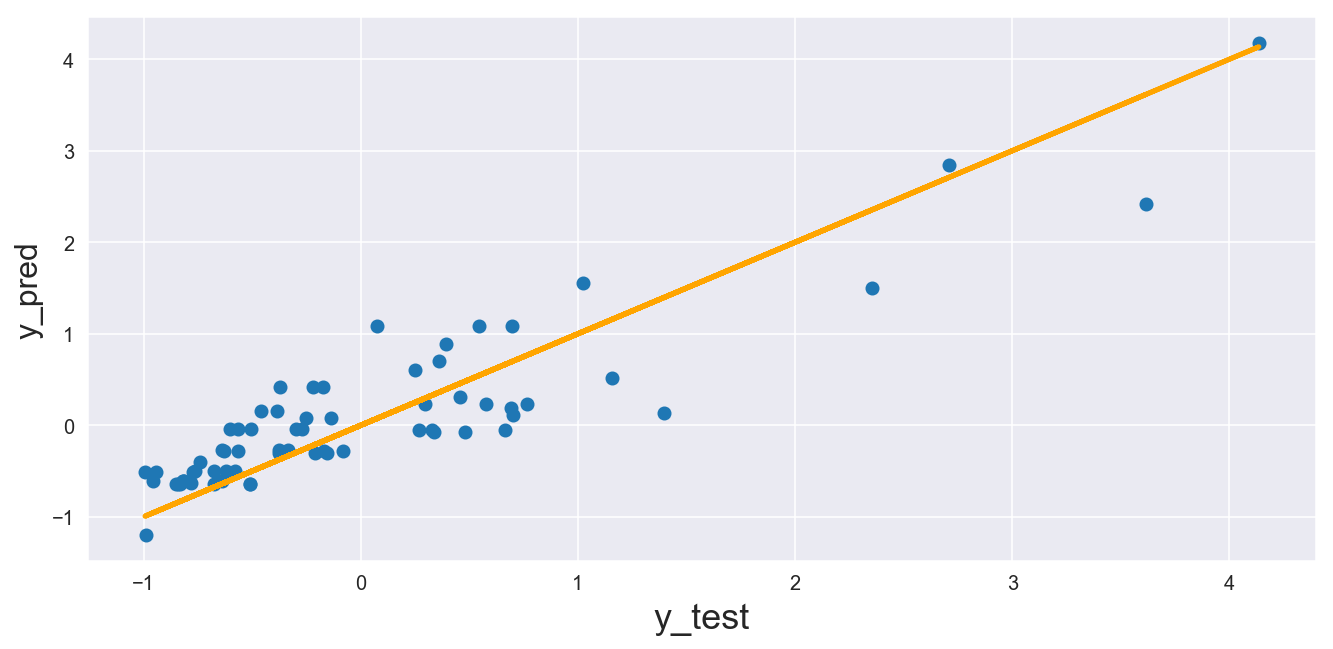

In [136]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")


# Résumé final du modèle

**Rappel: Coefficient de determination R².**

Si **R² = 0**: la variable dépendante Y ne peut pas être prédite à partir de la variable indépendante **X**

Si **R² = 1**: la variable dépendante Y peut être prédite à partir de la variable indépendante **X**

Si **0 < R² < 1**: Indique le pourcentage auquel la variable dépendante Y est prévisible de **X**

In [137]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8010284948072748

# Qu'est-ce qui a changé avec RFE?

1. **R²** a diminué de 0.05 et reste supérieur à 0,8 ce qui est bon.
2. La valeur du test **Durbin-watson** a augmenté, ce qui indique plus d'indépendance des erreurs.
3. La valeur du test **Golden-Quandt** a fortement augmenté, passant de **0.070** à **0.130**, et la ligne rouge est reste plate.(Beaucoup mieux homo-scédasticité)
4. Pas de multicolinéarité.

Mais, on voit que l'hypothèse de **normalité des erreurs** est violé.

Les données réelles comportent rarement des erreurs parfaitement distribuées normalement, et il peut ne pas être 
possible d'adapter vos données à un modèle dont les erreurs ne violent pas l'hypothèse de normalité. 

Il est généralement préférable de se concentrer sur les violations des autres hypothèses et / ou sur 
l'influence de quelques Outliers (qui peuvent de toute manière être responsables des violations de 
la normalité).

D'où si j'ai le choix entre, violer l'hypothèse de multicolinéarité ou l'hypothèse de normalité des erreurs. Je choisirai la normalité car c'est l'hypothèse la moins sensible parmi les autres.

In [138]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     183.9
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           1.13e-57
Time:                        14:34:03   Log-Likelihood:                -52.253
No. Observations:                 137   AIC:                             114.5
Df Residuals:                     132   BIC:                             129.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginesize              0.7574    

**Réduction de la dimension**

5 variables contre 59 pout **R² > 0.8** !!! C'est beaucoup mieux

# Est-ce que c'est bon ?

Toujours pas encore 100% parfait, à cause de l'existence des Outliers qui affectent fortement notre modèle

# Etape suivante

Détecter et traiter les Outliers (soit les supprimer, ou les corrigés s'il y a des erreurs) et voir s'il y a des améliorations.